# Unsupervised machine Learning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans,AgglomerativeClustering

In [2]:
df=pd.read_csv("File_22-23_top_assist_UCL.csv")
df.head(4)

,name,team,assits,goals,played,chances_created,chances_per90,total_passes,passes_complete,passes_incomplete,pass_accuracy
0,Kevin De Bruyne,Manchester City,6,2,10,16,1.60,341,265,76,78%
1,Vinícius Júnior,Real Madrid,5,7,12,13,1.08,406,327,79,81%
2,Federico Dimarco,Inter Milan,5,0,11,11,1.00,291,220,71,76%
3,Lionel Messi,Paris Saint Germain,4,4,7,15,2.14,396,346,50,87%


In [3]:
# Clustering
x=df.iloc[:,[4,5]].values
print(x)

[[10 16]
 [12 13]
 [11 11]
 [ 7 15]
 [ 9  5]
 [ 9 13]
 [10 15]
 [ 6  8]
 [10  2]
 [ 8  5]
 [ 7  3]
 [13 15]
 [ 8  1]
 [11 16]
 [ 7  4]
 [ 8  7]
 [ 9 17]
 [11 13]
 [ 3  4]
 [ 7  7]
 [12  8]
 [ 8 11]
 [10 13]
 [ 7 12]]


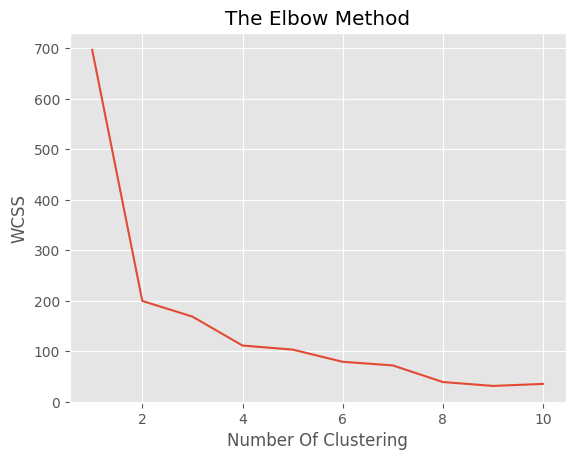

In [4]:
#elbow pivot use to determine the number of clustering
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)
wcss
plt.style.use("ggplot")
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number Of Clustering")
plt.ylabel("WCSS")
plt.show()   

In [5]:
ymeans=KMeans(n_clusters=2)
pred=ymeans.fit_predict(x)
pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0])

In [6]:
df.head(2)

,name,team,assits,goals,played,chances_created,chances_per90,total_passes,passes_complete,passes_incomplete,pass_accuracy
0,Kevin De Bruyne,Manchester City,6,2,10,16,1.60,341,265,76,78%
1,Vinícius Júnior,Real Madrid,5,7,12,13,1.08,406,327,79,81%


In [7]:
df=pd.DataFrame(data=x,columns=["played","chances_created"])
df["cluster"]=pred
df.head(4)

,played,chances_created,cluster
0,10,16,0
1,12,13,0
2,11,11,0
3,7,15,0


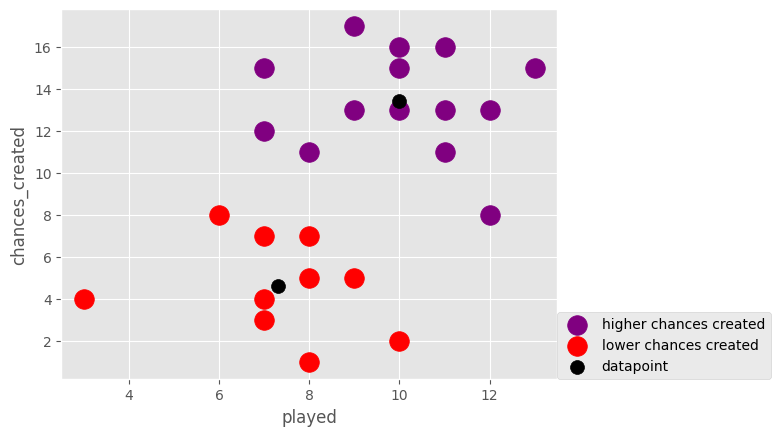

In [8]:
plt.scatter(x[pred==0,0],x[pred==0,1] ,c="purple",s=200,label="higher chances created")
plt.scatter(x[pred==1,0],x[pred==1,1] ,c="red",s=200,label="lower chances created")
plt.scatter(ymeans.cluster_centers_[:,0],ymeans.cluster_centers_[:,1] ,c="black",s=100,label="datapoint")
plt.xlabel("played")
plt.ylabel("chances_created")
plt.legend(loc=[1,0])
plt.show()

In [9]:
df=pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le=LabelEncoder()
encoded=le.fit_transform(df["Country"])
encoded

array([36, 36, 36, ..., 13, 13, 13])

In [12]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [14]:
# Clustering
x=df.iloc[:,[6,7]].values
print(x)

[[17850.0 'United Kingdom']
 [17850.0 'United Kingdom']
 [17850.0 'United Kingdom']
 ...
 [12680.0 'France']
 [12680.0 'France']
 [12680.0 'France']]


In [15]:
#elbow pivot use to determine the number of clustering
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)
wcss
plt.style.use("ggplot")
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number Of Clustering")
plt.ylabel("WCSS")
plt.show() 

ValueError: could not convert string to float: 'United Kingdom'

In [ ]:
# 1. Import the required libraries:
import pandas as pd
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#2. Load the sales dataset into a pandas DataFrame:
df = pd.read_excel("Online Retail.xlsx")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
# 3. Prepare the data for clustering:
# Select the relevant columns for clustering
data = df[['Quantity', 'UnitPrice']]
data

,Quantity,UnitPrice
0,6,2.55
1,6,3.39
2,8,2.75
3,6,3.39
4,6,3.39
...,...,...
541904,12,0.85
541905,6,2.10
541906,4,4.15
541907,4,4.15


In [ ]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [ ]:
# 4. Determine the optimal number of clusters using the elbow method:
# Initialize an empty list to store the inertia values
inertia = []

In [ ]:
# Iterate over a range of k values
for k in range(1, 11):
    # Initialize and fit the KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    
    # Append the inertia value to the list
    inertia.append(kmeans.inertia_)

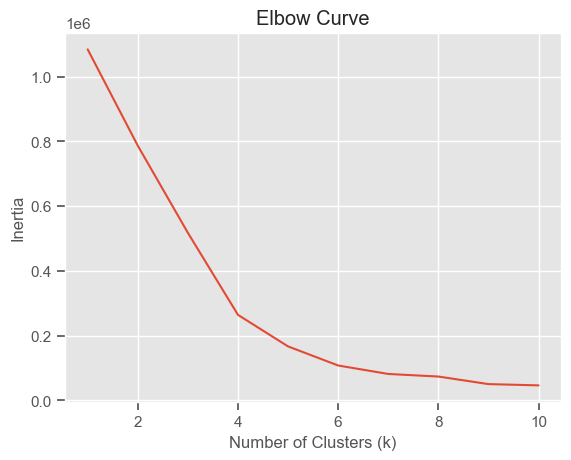

In [ ]:
# Plot the elbow curve
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

In [ ]:
# 5. Choose the optimal number of clusters based on the elbow curve and re-fit the KMeans model:
# Based on the elbow curve, choose the optimal number of clusters
k = 3

In [ ]:
# Initialize and fit the KMeans model with the chosen number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=42)

In [ ]:
# 6. Assign cluster labels to each data point and add them as a new column in the DataFrame:
df['Cluster'] = kmeans.labels_

In [ ]:
# 7. Analyze the clusters and interpret the results:
# Calculate the mean values for each cluster
cluster_means = df.groupby('Cluster')[['Quantity', 'UnitPrice']].mean()

In [ ]:
# Print the cluster means
print(cluster_means)

             Quantity    UnitPrice
Cluster                           
0            9.266447     4.054723
1           -0.806452  9730.436452
2        77605.000000     1.560000


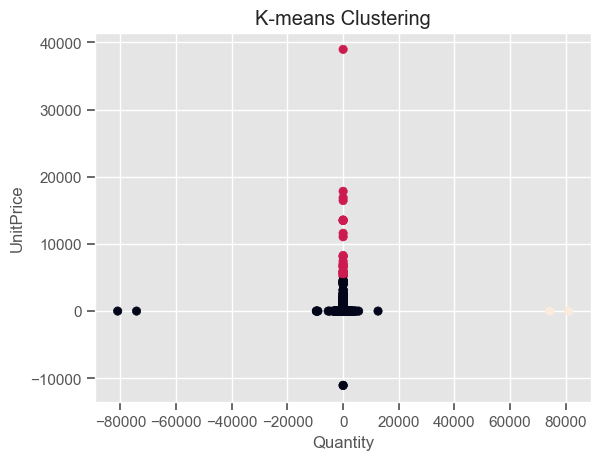

In [ ]:
# 8. Visualize the clusters:
# Create a scatter plot of the data points colored by cluster
plt.scatter(df['Quantity'], df['UnitPrice'], c=df['Cluster'])
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('K-means Clustering')
plt.show()